In [ ]:
!pip install tweepy
!pip install textblob
!pip install matplotlib


In [ ]:
!pip install --upgrade tweepy


In [3]:
!pip install nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.92      0.89      0.90       172
    Negative       0.90      0.95      0.92       266
     Neutral       0.97      0.89      0.93       284
    Positive       0.88      0.92      0.90       277

    accuracy                           0.91       999
   macro avg       0.92      0.91      0.91       999
weighted avg       0.92      0.91      0.92       999



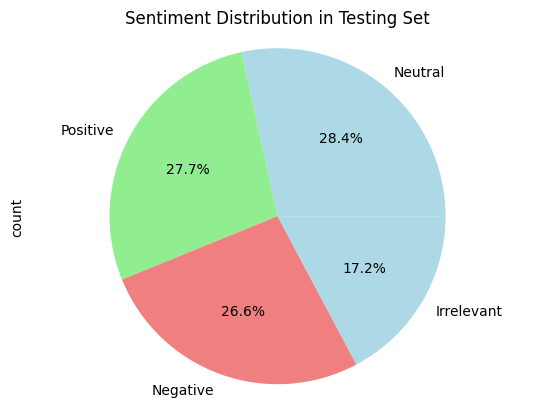

In [3]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def clean_tweet(self, tweet):
        # Check if tweet is NaN
        if pd.isnull(tweet):
            return ''
        # Remove special characters, hyperlinks, and usernames from the tweet
        cleaned_tweet = re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', '', str(tweet))
        return cleaned_tweet

    def analyze_sentiment(self, tweet):
        # Analyze the sentiment of the tweet using TextBlob
        analysis = TextBlob(tweet)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

    def perform_sentiment_analysis(self, train_file_path, test_file_path):
        # Read the training and testing CSV files into DataFrames
        train_df = pd.read_csv(train_file_path)
        test_df = pd.read_csv(test_file_path)

        # Clean each tweet in both training and testing sets
        train_df['cleaned_tweet'] = train_df['tweet'].apply(self.clean_tweet)
        test_df['cleaned_tweet'] = test_df['tweet'].apply(self.clean_tweet)

        # Drop rows with missing values in the training and testing sets
        train_df.dropna(subset=['cleaned_tweet'], inplace=True)
        test_df.dropna(subset=['cleaned_tweet'], inplace=True)

        # Split the data into features (X) and target (y) for both training and testing sets
        X_train = train_df['cleaned_tweet']
        y_train = train_df['sentiment']
        X_test = test_df['cleaned_tweet']
        y_test = test_df['sentiment']

        # Create a pipeline with CountVectorizer and a classifier (e.g., Logistic Regression)
        model = make_pipeline(CountVectorizer(), LogisticRegression())

        # Train the model on the training data
        model.fit(X_train, y_train)

        # Evaluate the model on the testing data
        y_pred = model.predict(X_test)

        # Print the classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Plot a pie chart to visualize the distribution of sentiments in the testing set
        sentiment_counts = y_test.value_counts()
        sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
        plt.title('Sentiment Distribution in Testing Set')
        plt.axis('equal')
        plt.show()


if __name__ == "__main__":
    sa = SentimentAnalysis()
    train_file_path = '/content/twitter_training.csv'
    test_file_path = '/content/twitter_validation.csv'
    sa.perform_sentiment_analysis(train_file_path, test_file_path)
